# Cloud Kitchens | Take Home Assessment - Jun Chung

### Importing the Data

In [1]:
import pandas as pd

In [2]:
original_dataset = pd.read_csv('css_public_all_ofos_locations.csv', 
                   sep = chr(1), 
                   low_memory = False)

In [3]:
original_dataset.head(3)

,restaurant_id,name,platform,sub_platform,latitude,longitude,city,country,active,standardized_name,restaurant_chain,delivery_radius,geom
0,9744,Loco Coco,caviar,NaN,40.765004,-73.965961,NaN,US,TRUE,loco_coco,NaN,NaN,NaN
1,4903,Musubi,caviar,NaN,45.504641,-122.643806,NaN,US,FALSE,musubi,NaN,NaN,NaN
2,4723,The Bakers' Lounge,caviar,NaN,38.924559,-76.990115,NaN,US,FALSE,the_bakers_lounge,NaN,NaN,NaN


In [4]:
original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644089 entries, 0 to 644088
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   restaurant_id      644089 non-null  object 
 1   name               644086 non-null  object 
 2   platform           644087 non-null  object 
 3   sub_platform       599311 non-null  object 
 4   latitude           644086 non-null  object 
 5   longitude          644070 non-null  object 
 6   city               56196 non-null   object 
 7   country            644071 non-null  object 
 8   active             643867 non-null  object 
 9   standardized_name  643872 non-null  object 
 10  restaurant_chain   169 non-null     object 
 11  delivery_radius    354661 non-null  object 
 12  geom               0 non-null       float64
dtypes: float64(1), object(12)
memory usage: 63.9+ MB


In [5]:
print('The provided data has {0} rows and {1} columns of restaurant data.'.format(
    original_dataset.shape[0], 
    original_dataset.shape[1])
     )

The provided data has 644089 rows and 13 columns of restaurant data.


### Creating a New Dataset

In [6]:
# to keep the original provided dataset unaltered
# I am making a copy of the data to use for data cleaning, pre-processing, etc

data = original_dataset.copy()

I want to check to see if I can manually insert the missing names of the 3 rows missing values in the 'name' column.

In [7]:
# using simple boolean indexing to examine the rows with missing values for the 'name' column

print(data[data['name'].isnull()])

                    restaurant_id name      platform sub_platform latitude  \
34794                        None  NaN  delivery.com          NaN      NaN   
236516  Recreation & Wellness Ctr  NaN           NaN          NaN      NaN   
316021                  Suite 112  NaN           NaN          NaN      NaN   

       longitude city country active standardized_name restaurant_chain  \
34794        NaN  NaN      US  FALSE               NaN              NaN   
236516       NaN  NaN     NaN    NaN               NaN              NaN   
316021       NaN  NaN     NaN    NaN               NaN              NaN   

       delivery_radius  geom  
34794              NaN   NaN  
236516             NaN   NaN  
316021             NaN   NaN  


#### Deleting Rows with Little to No Value

Because there is almost no other data I can use, such as latitude and longitude data, to determine what these restaurants may be, I am deleting these rows of data entirely from the dataset.

In [8]:
data.dropna(subset = ['name'], inplace = True)
data.reset_index(inplace = True, drop = True)

In [9]:
print('The dataset now has {0} rows and {1} columns of restaurant data.'.format(
    data.shape[0], 
    data.shape[1])
     )

The dataset now has 644086 rows and 13 columns of restaurant data.


#### Quick Data Transformations on Restaurant Names

In order to prevent issues with analyses in the future, I will clean up restaurant name data using some string methods to:
- Make every character lowercase
- Replace all dashes ("-") and underscores ("_") with spaces
- Removing all apostophes ("'")

In [10]:
data['name'] = data['name'].str.lower().str.replace('-', ' ').str.replace('_', ' ').str.replace('\'', '')

### Removing Columns

Explain why some columns are removed and why they might not offer much value for what I'm trying to do and why.

In [11]:
data.drop(columns = ['city', 'restaurant_chain', 'delivery_radius', 'geom', 'standardized_name'], inplace = True)

data.columns

Index(['restaurant_id', 'name', 'platform', 'sub_platform', 'latitude',
       'longitude', 'country', 'active'],
      dtype='object')

### Exploring Missing Latitude and Longitude Values

In [12]:
# checking what missing values may exist in the latitude column
# using simple boolean indexing to examine the rows with missing values for the 'latitude' column

print(data[data['latitude'].isnull()])

Empty DataFrame
Columns: [restaurant_id, name, platform, sub_platform, latitude, longitude, country, active]
Index: []


It appears that getting rid of the rows where the value in the 'name' column was missing also removed the rows that were missing latitude data. 

In [13]:
# using the same method as above to examine the rows with missing values for the 'longitude' column

print('Only a few of the rows are displayed for easier viewing.\n')
print('--------------------------------------------------------\n')
print(data[data['longitude'].isnull()][:5])    # remove the indexing to see all rows with missing 'longitude' values

Only a few of the rows are displayed for easier viewing.

--------------------------------------------------------

                                            restaurant_id name  \
139275                                    20 Hugus Alley"  usd   
187182                                           Ste 190"  usd   
194074                                           Ste 170"  usd   
201826  (b/t N P St & N Rhode Island Ave) in Logan Cir...  usd   
204009                                           Ste 100"  usd   

                                                 platform sub_platform  \
139275  [["open: 12:00, close: 18:00"], ["open: 12:00,...         TRUE   
187182                       [[], [], [], [], [], [], []]        FALSE   
194074  [["open: 12:00, close: 21:00"], ["open: 12:00,...         TRUE   
201826  [["open: 12:00, close: 21:30"], ["open: 12:00,...         TRUE   
204009  [["open: 12:00, close: 18:30"], ["open: 12:00,...         TRUE   

                             latitude long

It appears that, for whatever reason, data was not input and/or collected properly for the data points above. The values within each column seem to be in the wrong place. However, I can simply:
- Look these restaurants up on the internet
- Fill in + replace the existing values with correct values

##### Correct Information for Restaurants
I'll be looking up the restaurants up by their names, which I am presuming are the values found in the 'latitude' column. I can confirm I am collecting information for the correct restaurants with the other information available (but misplaced) in the other columns.
- Row 139275 (Sugarfina) [info](https://www.yelp.com/biz/sugarfina-pasadena-pasadena-2)
- Row 187182 (Ohjah Nooodle House) [info](https://www.yelp.com/biz/ohjah-noodle-house-las-vegas-3)
- Row 194074 (Novecento Pizzeria) [info](https://www.yelp.com/biz/novecento-pizzeria-las-vegas)
- Row 201826 (14th St Cafe Asian Bistro) [info](https://www.yelp.com/biz/14th-st-cafe-asian-bistro-washington-2)
- Row 204009 (Straight From Philly Steakout) [info](https://www.yelp.com/biz/straight-from-philly-steakout-henderson-3)
- Row 229923 (Tumbao Buns - Downtown Miami) [info](https://www.yelp.com/biz/tumbao-buns-downtown-miami-miami-2)
    - The address found on the Yelp page doesn't match with the one provided on the data set. This is most likely due to the fact that this restaurant is technically a food truck, a mobile restuarant that can have different locations. The correct address is listed [here](https://postmates.com/merchant/tumbao-buns-miami)
- Row 250285 (Dunkin Donuts) [info](https://www.yelp.com/biz/dunkin-donuts-pompano-beach-7?osq=dunkin+donuts+locations)
- Row 294759 (Dos Coyotes Border Cafe) [info](https://www.grubhub.com/restaurant/dos-coyotes-border-cafe-8519-bond-rd-ste-100-elk-grove/1244011)
- Row 298938 (China One) [info](https://www.grubhub.com/restaurant/china-one-7080-n-durango-dr-ste-130-las-vegas/394082)
- Row 302088 (Fat Boy) [info](https://www.yelp.com/biz/fat-boy-henderson-2)
- Row 341276 (Au Bon Pain) [info](https://www.yelp.com/biz/au-bon-pain-chicago-14)
- Row 344993 (Ohjah Noodle House 2) [info](https://www.grubhub.com/restaurant/ohjah-noodle-house-35-e-horizon-ridge-pkwy-ste-160-henderson/1121695)
    - This may, interestingly, be the same as the other Ohjah Noodle House listed above. Investigate further.
- Row 355632 (Cinnabon) [info](https://www.zomato.com/maricopa-county-az/scholtzskys-cinnabon-1-goodyear)
- Row 379700 (Thailicious Authentic Thai & Vegan) [info](https://www.yelp.com/biz/thailicious-authentic-thai-and-vegan-henderson?osq=thailicious)
- Row 391644 (Boss's Slow Smoked BBQ) [info](https://www.yelp.com/biz/bosss-slow-smoked-bbq-n-las-vegas)
- Row 415759 (Buon Gusto Ristorante) [info](https://www.yelp.com/biz/buon-gusto-ristorante-henderson)

A closer look at our actual data set shows that the rows of data above are not unique data points but instead are repeats of rows directly preceding them. 

In [14]:
print(data.iloc[250284:250286,:])

                               restaurant_id           name  \
250284  70f366b3-a6fd-4634-8e57-7364e8f23cd2  dunkin donuts   
250285                          Fl Turnpike"            usd   

                            platform sub_platform       latitude  \
250284                     postmates   restaurant    28.51478909   
250285  [[], [], [], [], [], [], []]        FALSE  dunkin_donuts   

           longitude country active  
250284  -81.49956571      US    NaN  
250285           NaN     NaN     40  


In [15]:
indices_missing_lat = [139275, 187182, 194074, 
                    201826, 204009, 229923, 
                    250285, 294759, 298938, 
                    302088, 341276, 344993, 
                    355632, 379700, 391644, 415759]

for index in indices_missing_lat:
    print(data.iloc[index - 1,1])

sugarfina
ohjah noodle house
novecento pizzeria
14th street cafe asian bistro
straight from philly steakout
tumbao buns
dunkin donuts
dos coyotes border cafe
china one
fat boy
au bon pain
ohjah noodle house #2
cinnabon
thailicious
bosss slow smoked bbq
buon gusto ristorante


The simple solution is to remove the rows missing 'longitude' values, as they represent duplicate entries.

In [16]:
data.dropna(subset = ['longitude'], inplace = True)
data.reset_index(inplace = True, drop = True)

In [17]:
print('The dataset now has {0} rows and {1} columns of restaurant data.'.format(
    data.shape[0], 
    data.shape[1])
     )

The dataset now has 644070 rows and 8 columns of restaurant data.


## A Quick Glance at Country Values

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644070 entries, 0 to 644069
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   restaurant_id  644070 non-null  object
 1   name           644070 non-null  object
 2   platform       644070 non-null  object
 3   sub_platform   599295 non-null  object
 4   latitude       644070 non-null  object
 5   longitude      644070 non-null  object
 6   country        644070 non-null  object
 7   active         643850 non-null  object
dtypes: object(8)
memory usage: 39.3+ MB


In [19]:
data['country'].describe()

count     644070
unique        27
top           US
freq      643890
Name: country, dtype: object

Most of the data points have 'US' listed in the 'country' column, so there would be value in examining the rows in which this is not the case.

In [20]:
not_us_data = data[data['country'] != 'US']

not_us_data

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
96549,",USD,[[""""open: 12:00","close: 20:30""""]","[""""open: 12:00","close: 20:30""""]","[""""open: 12:00","close: 20:30""""]","close: 20:30""""]","close: 20:30""""]"
96958,",USD,[[""""open: 11:30","close: 20:00""""]","[""""open: 11:30","close: 20:00""""]","[""""open: 11:30","close: 20:00""""]","close: 20:00""""]","close: 20:00""""]"
97841,",USD,[[""""open: 13:00","close: 23:00""""]","[""""open: 13:00","close: 23:00""""]","[""""open: 13:00","close: 23:00""""]","close: 23:00""""]","close: 00:00""""]"
104012,",USD,[[]",[],[],[],[],[],FALSE,NaN
104302,",USD,[[""""open: 17:00","close: 23:30""""]",[],"[""""open: 17:00","close: 23:00""""]","[""""open: 17:00","[""""open: 17:00","[]]"""
...,...,...,...,...,...,...,...,...
426413,",USD,[[""""open: 17:00","close: 19:00""""]","[""""open: 17:00","close: 19:00""""]","[""""open: 17:00","close: 19:00""""]","close: 19:00""""]","close: 21:30""""]"
428302,",USD,[[]",[],[],[],[],[],FALSE,NaN
431379,",USD,[[""""open: 14:00","close: 22:00""""]","[""""open: 14:00","close: 22:00""""]","[""""open: 14:00","close: 22:00""""]","close: 22:00""""]","close: 22:00""""]"
433563,",USD,[[]","[""""open: 17:00","close: 20:00""""]","[""""open: 17:00","close: 20:00""""]","[""""open: 18:30","[""""open: 17:00","[""""open: 17:00"


It seems possible that the rows of data that don't state 'US' in the country column are also filled with data that was entered or collected incorrectly. 

Upon observation, there seems to be a mix of restaurant hours, names, delivery radii, booleans, and NaNs found throughout this data. 

In [21]:
strange_us_rows = ((644070 - 643890) / 644070) * 100
print(round(strange_us_rows, 3), '% of the dataset')

0.028 % of the dataset


For the sake of time, because only 0.028% of the data is mislabeled as such, the appropriate solution at this time is to simply remove these data points.

In [22]:
data = data[data['country'] == 'US']

print('There are now {0} restaurants in the dataset and {1} columns of relevant data.'.format(
    data.shape[0], 
    data.shape[1])
     )

There are now 643890 restaurants in the dataset and 8 columns of relevant data.


## Latitude

include an explanation about how I intend to go about solving the problem and why it's important to clean and process the latitude and longitude as much as possible.

In [23]:
data.dtypes

restaurant_id    object
name             object
platform         object
sub_platform     object
latitude         object
longitude        object
country          object
active           object
dtype: object

In [24]:
data.loc[0]

restaurant_id          9744
name              loco coco
platform             caviar
sub_platform            NaN
latitude          40.765004
longitude        -73.965961
country                  US
active                 TRUE
Name: 0, dtype: object

Explain why I am making changes to the following columns and not to others.

In [25]:
data['name'] = data['name'].astype('str')
data['platform'] = data['platform'].astype('str')
data['latitude'] = data['latitude'].astype('float')
data['longitude'] = data['longitude'].astype('float')

In [26]:
data['latitude'].value_counts(dropna = True).sort_values(ascending = False)

-90.000000    1683
 40.762646     101
 42.825685      80
 34.039710      67
 35.279820      66
              ... 
 27.036954       1
 33.996883       1
 40.779721       1
 33.998372       1
 32.162496       1
Name: latitude, Length: 544594, dtype: int64

Out of curiosity, I want to run the same observations on the longitude column.

In [27]:
data['longitude'].value_counts(dropna = False).sort_values(ascending = False)

 0.000000      1722
-73.969185      101
-118.298741     100
-73.879458       80
-118.298796      67
               ... 
-122.433768       1
-90.110298        1
-117.048787       1
-75.224099        1
-81.751534        1
Name: longitude, Length: 541745, dtype: int64

Interestingly, there are a lot of data points with a longitude value of 0. I will explore this further in a later section.

In [28]:
lat_90 = data[data['latitude'] == -90.000000]

print(lat_90)

      restaurant_id                name      platform sub_platform  latitude  \
60            59739          bequ juice  delivery.com          NaN     -90.0   
64            63820          ginos east  delivery.com          NaN     -90.0   
100           64603          sori sushi  delivery.com          NaN     -90.0   
201           63305          ezras food  delivery.com          NaN     -90.0   
212           57676   cupping room cafe  delivery.com          NaN     -90.0   
...             ...                 ...           ...          ...       ...   
44649            81  cozy soup n burger  delivery.com          NaN     -90.0   
44691         61491              wichit  delivery.com          NaN     -90.0   
44715         61250           fdgdfgdfg  delivery.com          NaN     -90.0   
44740         58580           neo sushi  delivery.com          NaN     -90.0   
44746         62673          moonstruck  delivery.com          NaN     -90.0   

       longitude country active  
60   

In [29]:
lat_90['platform'].value_counts(dropna = False, normalize = True)

delivery.com    1.0
Name: platform, dtype: float64

In [30]:
lat_90['active'].value_counts(dropna = False, normalize = True)

FALSE    1.0
Name: active, dtype: float64

In [31]:
lat_90['longitude'].value_counts(dropna = False, normalize = True)

0.0    1.0
Name: longitude, dtype: float64

For all of the data points with a latitude value of -90, three interesting things the data points all have in common are:

- All are considered "inactive"
- All of these data points shared the platform delivery.com
- All have a longitude value of 0

In [32]:
data['platform'].value_counts(dropna = False)

doordash        354553
postmates       110242
grubhub          68579
ubereats         65741
delivery.com     34807
caviar            9968
Name: platform, dtype: int64

Quickly checking that it's not an issue with all delivery.com data but just the ones found earlier.

In [33]:
data[data['platform'] == 'delivery.com']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
47,68986,crown fried chicken,delivery.com,NaN,40.634279,-73.949846,US,FALSE
48,89239,capri ristorante,delivery.com,NaN,41.865140,-87.789410,US,TRUE
49,73694,fin sushi bar,delivery.com,NaN,41.965212,-87.673360,US,TRUE
50,86326,bon chon harvard square,delivery.com,NaN,42.371670,-71.121040,US,TRUE
51,68391,pizza man,delivery.com,NaN,33.931870,-117.949910,US,TRUE
...,...,...,...,...,...,...,...,...
44772,61696,balade,delivery.com,NaN,40.730305,-73.983176,US,TRUE
44773,63702,hello pasta,delivery.com,NaN,40.759411,-73.970211,US,TRUE
44774,71933,napoli italian restaurant by papa zack,delivery.com,NaN,29.731403,-95.475292,US,TRUE
44775,54099,fatburger,delivery.com,NaN,30.621215,-96.342298,US,TRUE


My suspicion is that the data represented incorrectly with latitude values of -90 may already exist in the data set somehow. I'll check that now with some quick searches through the data set.

In [34]:
data[data['name'] == 'bequ juice']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
60,59739,bequ juice,delivery.com,NaN,-90.000000,0.000000,US,FALSE
27394,73431,bequ juice,delivery.com,NaN,40.728651,-73.986022,US,TRUE
39550,91771,bequ juice,delivery.com,NaN,40.728651,-73.986022,US,TRUE
215698,289315,bequ juice,grubhub,grubhub,40.728275,-73.985367,US,TRUE


It seems there is enough here to support my suspicions, as it seems like information on this platform was either updated and/or re-entered. However, if there is data present with name and platform data that doesn't have location data in the form of coordinates, I would have difficulty acquiring correct latitude and longitude data anyways. The time-sensitive solution is to simply remove the rows of data with missing latitude/longitude values.

I can remove the entries with -90 stated for their latitude values as they are simply not updated versions of data that exist already in the dataset.

In [35]:
data = data[data['latitude'] != -90.000000]

data['latitude'].value_counts(dropna = False)

40.762646    101
42.825685     80
34.039710     67
35.279820     66
34.039743     61
            ... 
38.780604      1
37.160258      1
33.425420      1
47.487414      1
25.760583      1
Name: latitude, Length: 544593, dtype: int64

## Longitude

In [36]:
data['longitude'].value_counts(dropna = False).sort_values(ascending = False)

-73.969185     101
-118.298741    100
-73.879458      80
-118.298796     67
-120.661130     66
              ... 
-122.433768      1
-90.110298       1
-117.048787      1
-75.224099       1
-81.751534       1
Name: longitude, Length: 541745, dtype: int64

Earlier, I discovered many data points had a longitude value of 0. Removing the data points with latitude values of -90 should have removed many of the rows with longitude values of 0.

In [37]:
data[data['longitude'] == 0]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
137,5648,jessica hui placeholder,caviar,NaN,0.0,0.0,US,FALSE
160,1526,the halal guys,caviar,NaN,0.0,0.0,US,FALSE
312,2045,zipchops venice,caviar,NaN,0.0,0.0,US,FALSE
325,6018,red hot chili pepper,caviar,NaN,0.0,0.0,US,FALSE
402,1229,duplicate,caviar,NaN,0.0,0.0,US,FALSE
816,6060,[deprecated] saffron indian bistro,caviar,NaN,0.0,0.0,US,FALSE
1016,653,blank,caviar,NaN,0.0,0.0,US,FALSE
1589,9239,bonci dnu,caviar,NaN,0.0,0.0,US,FALSE
2018,2277,test only dan schwartz,caviar,NaN,0.0,0.0,US,FALSE
5569,6595,bluestem brasserie,caviar,NaN,0.0,0.0,US,FALSE


There aren't very many rows with longitude values of 0, but interestingly the rows also have latitude values of 0. Upon closer inspection, there are a lot of restaurants with names that suggest they should not exist in the data set (e.g. "jessica hui placeholder", "jessica test"). I'll inspect the names of the restaurants more carefully later. For the time being, I will simply remove these rows as the most time-sensitive solution.

In [38]:
data = data[data['longitude'] != 0.0]

In [39]:
data[data['latitude'] == 0]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active


By getting rid of rows with longitude values of 0, I also happened to get rid of rows with latitude values of 0 as well.

## Further Examination on Latitude and Longitude

My final step is to check the latitude and longitude values to make sure they make logical sense. All data points represent restaurants in the US, so the latitude and longitude values should reflect that.

According to the information found at this [link](https://latitudelongitude.org/us/), the range of latitude and longitude values for US cities should range from:
- Latitude: 19.50139 to 64.85694
- Longitude: -161.75583 to -68.01197

With some simple boolean indexing, I can isolate and examine rows of values that do not come close to fitting in these general coordinates.

In [40]:
data[(data['latitude'] < 19)]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
4,5690,derek test merchant,caviar,NaN,1.000000,2.000000,US,FALSE
166,9812,the french bakery 112th ave [disabled],caviar,NaN,1.000000,-1.000000,US,FALSE
637,9398,donotuse,caviar,NaN,11.000000,-11.000000,US,FALSE
907,9607,[dnu] toms dim sum,caviar,NaN,11.000000,-11.000000,US,FALSE
913,1183,test doc ricketts catering,caviar,NaN,1.000000,2.000000,US,FALSE
1461,10348,pho viet 11th st,caviar,NaN,1.000000,1.000000,US,FALSE
2430,7415,pappasitos,caviar,NaN,0.111111,0.111111,US,FALSE
2819,10316,norah restaurant la,caviar,NaN,1.000000,1.000000,US,FALSE
5596,10335,india palace alameda,caviar,NaN,1.000000,1.000000,US,FALSE
5604,9364,donotusepepperoncini restaurant & bar,caviar,NaN,11.000000,-11.000000,US,FALSE


Examining strange coordinate data has in fact dug up an entirely new problem. At a glance, there are multiple rows of data with values for latitude and longitude that don't make much logical sense. When examining the names of said restuarants, one can see that many of the names of the restaurants include some form of:
- "DO NOT USE"
- "DISABLED"
- "TEST"

These need to be removed from the data set. Something to note is that all of the rows seen above that have one of the three ("DO NOT USE", "DISABLED", "TEST") labels on the respective restaurant name
- Are not active restaurants
- The platform is "caviar"

It's possible that something related to that platform led to multiple users creating a version of their restaurant to test the functionality of the site/app/program before creating a normal profile, hence the strange location data. I'll explore this now.

## Taking a Closer Look at the Names of Restaurants

In [41]:
import re

In [42]:
data[data['name'].str.contains('[Dd][Oo]\s*[Nn][Oo][Tt]\s*[Uu][Ss][Ee]')]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
29,6878,chens chinese & cuisine {do not use},caviar,NaN,41.888853,-87.633035,US,FALSE
164,5309,hot wok bistro too (do not use),caviar,NaN,37.495809,-122.247895,US,FALSE
350,9211,do not use,caviar,NaN,41.877671,-87.646821,US,FALSE
351,9370,[do not use] taylor gourmet the loop,caviar,NaN,41.882225,-87.628988,US,FALSE
370,3778,california pizza kitchen lenox square (do no...,caviar,NaN,33.846469,-84.362657,US,FALSE
...,...,...,...,...,...,...,...,...
565601,184479,duplicate do not use subway (2181 n meridian s...,doordash,doordash,39.797165,-86.156953,US,FALSE
594222,87297,fuzzys tacos (coo do not use),doordash,doordash,29.671878,-95.460527,US,FALSE
614478,37588,duplicate do not use american roadside,doordash,doordash,35.152501,-80.841481,US,FALSE
627323,314371,do not use,doordash,doordash,43.777990,-79.344091,US,FALSE


By using regular expressions (regex), we can see that there are other versions/formats that are all basically saying the same thing: to remove the row in question from the data set. I will explore more in the code below.

In [43]:
# a closer look at the string "DO NOT"

data[data['name'].str.contains('[Dd][Oo]\s*[Nn][Oo][Tt]\s*')]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
29,6878,chens chinese & cuisine {do not use},caviar,NaN,41.888853,-87.633035,US,FALSE
30,8216,king��s road cafe do not enable,caviar,NaN,34.076246,-118.372312,US,FALSE
139,5074,yucatan taco stand do not enable,caviar,NaN,32.815272,-96.770349,US,FALSE
143,3700,"[do not enable, bad duplicate] meehans (sandy ...",caviar,NaN,33.839531,-84.377089,US,FALSE
159,725,phuong thao [do not enable],caviar,NaN,37.376854,-122.030459,US,FALSE
...,...,...,...,...,...,...,...,...
627323,314371,do not use,doordash,doordash,43.777990,-79.344091,US,FALSE
631284,248591,do not activate jnovaks house of ceviche & man...,doordash,doordash,33.415009,-111.949098,US,TRUE
636574,71432,jaburritos duplicate do not activate,doordash,doordash,36.078083,-115.242157,US,FALSE
636999,56541,"krush burger, do not use, dup acct",doordash,doordash,38.773442,-121.269283,US,TRUE


There appear to be multiple ways that rows in the data set are denoted to be excluded. While we observed "DO NOT USE" earlier, there appear to be other statements in restaurant names that tell us the same thing (e.g. "DO NOT ENABLE", "DO NOT ACTIVATE").

In [44]:
# looking at names with the word "duplicate" in said names

data[data['name'].str.contains('[Dd][Uu][Pp][Ll][Ii][Cc][Aa][Tt][Ee]')]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
143,3700,"[do not enable, bad duplicate] meehans (sandy ...",caviar,NaN,33.839531,-84.377089,US,FALSE
152,601,tiffin bistro duplicate,caviar,NaN,39.934720,-75.162219,US,FALSE
155,803,pure fare south street duplicate,caviar,NaN,39.944246,-75.169180,US,FALSE
579,6691,via tribunali queen anne [duplicate],caviar,NaN,47.632169,-122.361350,US,FALSE
953,3698,"[do not enable, bad duplicate] willys mexicana...",caviar,NaN,33.783865,-84.378648,US,FALSE
...,...,...,...,...,...,...,...,...
643565,154607,papa murphys duplicate,doordash,doordash,40.113446,-88.203063,US,FALSE
643595,237367,papa murphys (star shoot parkway) duplicate,doordash,doordash,38.024013,-84.424365,US,FALSE
643627,253513,kreasian kitchen duplicate,doordash,doordash,34.278121,-118.736263,US,FALSE
643780,254426,papa murphys (state street) duplicate,doordash,doordash,38.306181,-85.842397,US,FALSE


We can see now that some restaurants can be labeled as duplicates without "DO NOT" also attached to their names (and vise-versa).

In [45]:
# also searching for the word "copy" which is synonymous for "duplicate"

data[data['name'].str.contains('[Cc][Oo][Pp][Yy]')]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
840,2287,cafe ole copy,caviar,NaN,38.941704,-77.077104,US,FALSE
4294,73842,choppers infocache copy,delivery.com,NaN,41.911545,-87.667617,US,FALSE
4815,79618,duplicate copy of masters pizza pasta & gril...,delivery.com,NaN,34.097480,-118.338670,US,FALSE
12710,66141,duplicate copy of peking express before kgis...,delivery.com,NaN,40.741802,-73.990555,US,FALSE
14127,64996,joannes import staging listing for appending...,delivery.com,NaN,40.762646,-73.969185,US,FALSE
15354,73746,(temp / test duplicate) copy of my thai rboyce,delivery.com,NaN,32.755044,-117.099129,US,FALSE
16833,2138,"naan n curry (2nd copy, unused)",caviar,NaN,37.764284,-122.464891,US,FALSE
20000,79654,duplicate copy of wolfnights rid 67892,delivery.com,NaN,34.062306,-118.350917,US,FALSE
22010,71391,sample restaurant testing copyover,delivery.com,NaN,40.762646,-73.969185,US,FALSE
24946,63955,mama mia #69568 copyover,delivery.com,NaN,40.703276,-74.009694,US,FALSE


While it is obvious that many of the restaurants with "copy" in their name are indeed duplicates, a few restaurants have "copy" in their actual names (e.g. "Copycat Co"). An interesting bit of text that some restaurants have included in their 'name' values is "UPDATE". I will explore this more below.

In [46]:
data[data['name'].str.contains('[Uu][Pp][Dd][Aa][Tt][Ee]')]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
4815,79618,duplicate copy of masters pizza pasta & gril...,delivery.com,NaN,34.097480,-118.338670,US,FALSE
9987,64847,gracies corner diner updated menu test acct,delivery.com,NaN,40.777749,-73.951775,US,FALSE
10515,64003,bon chon chicken fake restaurant 10/9 update,delivery.com,NaN,40.703276,-74.009694,US,FALSE
12710,66141,duplicate copy of peking express before kgis...,delivery.com,NaN,40.741802,-73.990555,US,FALSE
15297,79429,duplicate menu update for thai dishes hold...,delivery.com,NaN,41.952821,-87.677771,US,TRUE
22225,64414,duplicate 5th china tung before kgisl menu u...,delivery.com,NaN,27.110374,-80.308038,US,FALSE
26448,79208,updated menu for als italian beef,delivery.com,NaN,41.869304,-87.663019,US,FALSE
32029,79518,red pepper pizza back up of updated menu,delivery.com,NaN,40.682571,-73.993097,US,TRUE
32632,30869,color me greens update for 10/1.,delivery.com,NaN,40.703276,-74.009694,US,TRUE
33966,79764,duplicate copy of las olas sushi bar to be u...,delivery.com,NaN,34.102520,-118.291860,US,FALSE


While some of these restaurant names make it very clear that they are copies or duplicates of entries, "update" is not as clear. Update could suggest changes to menus, locations, names, etc. I will revisit this later.

In [47]:
data[data['name'].str.contains('[Tt][Ee][Ss][Tt]')]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
4,5690,derek test merchant,caviar,NaN,1.000000,2.000000,US,FALSE
627,3879,nickys test [do not enable],caviar,NaN,37.775231,-122.417528,US,FALSE
685,64095,sample restaurant for testing complex menu,delivery.com,NaN,40.760541,-73.970354,US,FALSE
878,3542,[test2]sugarfish by sushi nozawa,caviar,NaN,40.703738,-73.638472,US,FALSE
913,1183,test doc ricketts catering,caviar,NaN,1.000000,2.000000,US,FALSE
...,...,...,...,...,...,...,...,...
639531,50988,dep test store,doordash,doordash,43.638283,-79.425290,US,TRUE
639594,392005,novadine v2 test store,doordash,doordash,58.372186,-134.587152,US,TRUE
639862,330076,test,doordash,doordash,33.495742,-86.876172,US,TRUE
642231,230772,testo pepesto (e main st),doordash,doordash,32.794609,-116.959992,US,TRUE


As seen above (e.g. "Testo Pepesto", "Greatest B-B-Q") filtering out restaurants for having some form of "TEST" in its name may not accurately weed out duplicates. I can adjust the regex in a later stage, but filtering by "TEST" must be done more carefully.

## Removing Rows by Name

It's evident that there are a number of rows in the data set calling for exclusion. As seen above, many duplicates exist that can be simply filtered out using some simple regular expressions (regex). I intend to:
- Remove rows with some version/format of the string "Duplicate" (Since over 5000 rows of data include this in their restaurant name)
- Remove rows with some version/format of the string "Do Not" (Multiple ways of denoting the need for exclusion from the data set exist, including but not limited to "do not use", "do not activate", "do not enable")
- Re-examine restaurants with some version/format of the following strings in their respective name:
    - "update"
    - "sample"
    - "copy"
    - "test"

In [48]:
# removing restaurants with some form of "duplicate" in its name
data = data[data['name'].str.contains('[Dd][Uu][Pp][Ll][Ii][Cc][Aa][Tt][Ee]') == False]
print('The dataset now has {0} rows and {1} columns of restaurant data.'.format(
    data.shape[0], 
    data.shape[1])
     )

The dataset now has 637010 rows and 8 columns of restaurant data.


In [49]:
# removing restaurants with some form of "do not" in its name
data = data[data['name'].str.contains('[Dd][Oo]\s*[Nn][Oo][Tt]\s*') == False]
print('The dataset now has {0} rows and {1} columns of restaurant data.'.format(
    data.shape[0], 
    data.shape[1])
     )

The dataset now has 636772 rows and 8 columns of restaurant data.


#### Re-Examining Restaurants w/ Some Form of "update" in its Name

In [50]:
data[data['name'].str.contains('[Uu][Pp][Dd][Aa][Tt][Ee]')]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
9987,64847,gracies corner diner updated menu test acct,delivery.com,NaN,40.777749,-73.951775,US,FALSE
10515,64003,bon chon chicken fake restaurant 10/9 update,delivery.com,NaN,40.703276,-74.009694,US,FALSE
26448,79208,updated menu for als italian beef,delivery.com,NaN,41.869304,-87.663019,US,FALSE
32029,79518,red pepper pizza back up of updated menu,delivery.com,NaN,40.682571,-73.993097,US,TRUE
32632,30869,color me greens update for 10/1.,delivery.com,NaN,40.703276,-74.009694,US,TRUE
35162,60980,eddy catering (update that were inputting from...,delivery.com,NaN,40.753786,-73.989773,US,FALSE
37619,91660,afternoon tea update,delivery.com,NaN,42.825685,-73.879458,US,TRUE
38913,63512,the classic diner (copy of original update),delivery.com,NaN,40.703276,-74.009694,US,FALSE


It seems pretty obvious that all of these rows can be removed because the data already exists in the data set. There aren't many rows, so I'll demonstrate below how each restaurant in the dataframe above is a repeat of an existing data point.

In [51]:
data[data['name'] == 'gracies corner diner']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
109157,66226,gracies corner diner,grubhub,grubhub,40.777123,-73.949970,US,TRUE
608910,54903,gracies corner diner,doordash,doordash,40.776840,-73.949756,US,TRUE


In [52]:
data[data['name'] == 'bon chon chicken']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
39492,92571,bon chon chicken,delivery.com,NaN,40.747378,-73.985193,US,TRUE
100013,297759,bon chon chicken,grubhub,grubhub,40.747338,-73.985088,US,TRUE
216793,47cc5230-84bd-432e-b2b9-3807a800cd02,bon chon chicken,postmates,restaurant,37.371954,-121.846143,US,TRUE
389234,5ada474d-609a-4ef2-9dd5-4a02c2d0d00b,bon chon chicken,postmates,restaurant,37.362701,-122.026382,US,FALSE


In [53]:
data[data['name'] == 'afternoon tea']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
1109,91688,afternoon tea,delivery.com,NaN,42.825685,-73.879458,US,FALSE


In [54]:
data[data['name'] == 'color me greens']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
39588,83868,color me greens,delivery.com,NaN,40.699230,-73.912720,US,TRUE
98149,309741,color me greens,grubhub,grubhub,40.699195,-73.912966,US,TRUE


I will filter the data set and remove these rows from my original data set.

In [55]:
# removing restaurants with some form of "duplicate" in its name
data = data[data['name'].str.contains('[Uu][Pp][Dd][Aa][Tt][Ee]') == False]
print('The dataset now has {0} rows and {1} columns of restaurant data.'.format(
    data.shape[0], 
    data.shape[1])
     )

The dataset now has 636764 rows and 8 columns of restaurant data.


#### Re-Examining Restaurants w/ Some Form of "sample" in its Name

In [56]:
data[(data['name'].str.contains('sample'))]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
685,64095,sample restaurant for testing complex menu,delivery.com,NaN,40.760541,-73.970354,US,FALSE
764,88213,sprightliis sample bagelry,delivery.com,NaN,40.760541,-73.970354,US,FALSE
2968,64529,(sample) italian,delivery.com,NaN,41.714577,-83.684994,US,TRUE
4462,68437,sample restaurant carlos jira testing,delivery.com,NaN,40.762646,-73.969185,US,FALSE
4487,71056,sample smoke shop,delivery.com,NaN,42.825685,-73.879458,US,FALSE
...,...,...,...,...,...,...,...,...
537881,211430,beijing express (e sample rd),doordash,doordash,26.274961,-80.116230,US,TRUE
578563,420740,nonnas pizza (w sample rd),doordash,doordash,26.272976,-80.263821,US,TRUE
579735,262939,tijuana flats (w. sample rd.),doordash,doordash,26.272877,-80.205693,US,TRUE
597718,262910,la granja (w sample rd),doordash,doordash,26.274350,-80.134681,US,TRUE


At a glance, I want to differentiate between results for the platform delivery.com and doordash. There seems to be a pattern with restaurant names including the word "sample" that are listed on the doordash platform.

In [57]:
data[(data['name'].str.contains('sample')) & (data['platform'] == 'delivery.com')]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
685,64095,sample restaurant for testing complex menu,delivery.com,NaN,40.760541,-73.970354,US,FALSE
764,88213,sprightliis sample bagelry,delivery.com,NaN,40.760541,-73.970354,US,FALSE
2968,64529,(sample) italian,delivery.com,NaN,41.714577,-83.684994,US,TRUE
4462,68437,sample restaurant carlos jira testing,delivery.com,NaN,40.762646,-73.969185,US,FALSE
4487,71056,sample smoke shop,delivery.com,NaN,42.825685,-73.879458,US,FALSE
4632,66521,sample restaurant argenis genao,delivery.com,NaN,40.760541,-73.970354,US,FALSE
4711,62133,sample foodfriendz (florida) beverages & utensils,delivery.com,NaN,30.626630,-96.333424,US,FALSE
6169,71055,sample restaurant marincorpsolutions.com,delivery.com,NaN,40.762646,-73.969185,US,FALSE
6226,64849,fake restaurant for tara leuci test/sample/t...,delivery.com,NaN,40.737710,-73.987949,US,FALSE
9078,75107,sample restaurant testing,delivery.com,NaN,40.762646,-73.969185,US,FALSE


Many of the restaurants with the word "sample" in their name from delivery.com look like data points that can and should be removed. For example, "sample freakin restaurant" or "sample liquor store" may represent actual restaurants, but in all likelihood these are useless rows of data saturating the data set. Another clue into the uselessness of the rows above can also be the similarity in latitude and longitude values of these sample rows. It is logically impossible for multiple places to be found on the exact same latitude and longitude coordinates.

Let's take a look at restaurants with the word "sample" that are not from delivery.com below.

In [58]:
data[(data['name'].str.contains('sample')) & (data['platform'] != 'delivery.com')]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
77520,191105,the sample room,doordash,doordash,45.009552,-93.271988,US,TRUE
120311,851337,subway� (w sample rd),grubhub,grubhub,26.272694,-80.162766,US,TRUE
167215,548795,samples restaurant,grubhub,grubhub,40.165287,-105.102112,US,TRUE
201848,332484,miami grill sample road (5650 w sample rd),doordash,doordash,26.273810,-80.201406,US,TRUE
210168,249950,sofias cafe on sample home of sheesk kabab,doordash,doordash,26.272481,-80.231649,US,TRUE
217886,366240,pinto thai bistro (e sample rd),doordash,doordash,26.275173,-80.109766,US,TRUE
300334,262896,firehouse subs (w sample rd),doordash,doordash,26.273460,-80.198948,US,TRUE
336442,262894,checkers (w sample rd),doordash,doordash,26.272890,-80.259204,US,TRUE
358261,105883,the melting pot (sample rd),doordash,doordash,26.272117,-80.264381,US,TRUE
389883,113995,red lantern (sample rd),doordash,doordash,26.275351,-80.134457,US,TRUE


These rows of data are actually meaningful. The majority of these data points have the text "sample" in their names because they are located on Sample Rd in Coral Springs, Florida. This explains why the coordinates for most of these restaurants are very close together and yet different.

It makes sense to remove the rows of data with the word "sample" only if that data point happens to be on the delivery.com platform.

In [59]:
# removing restaurants with some form of "sample" in its name & hosted on the platform delivery.com
data = data[(data['name'].str.contains('sample')) & (data['platform'] == 'delivery.com') == False]
print('The dataset now has {0} rows and {1} columns of restaurant data.'.format(
    data.shape[0], 
    data.shape[1])
     )

The dataset now has 636709 rows and 8 columns of restaurant data.


#### Re-Examining Restaurants w/ Some Form of "copy" in its Name

In [60]:
data[data['name'].str.contains('copy')]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
840,2287,cafe ole copy,caviar,NaN,38.941704,-77.077104,US,FALSE
4294,73842,choppers infocache copy,delivery.com,NaN,41.911545,-87.667617,US,FALSE
14127,64996,joannes import staging listing for appending...,delivery.com,NaN,40.762646,-73.969185,US,FALSE
16833,2138,"naan n curry (2nd copy, unused)",caviar,NaN,37.764284,-122.464891,US,FALSE
24946,63955,mama mia #69568 copyover,delivery.com,NaN,40.703276,-74.009694,US,FALSE
25896,79058,copy of menu for dozika restaurant rid: 74098,delivery.com,NaN,34.043040,-118.323560,US,TRUE
42036,66266,katzs delicatessen range copyover,delivery.com,NaN,40.750034,-74.026457,US,FALSE
332502,235929,copycat co,doordash,doordash,38.900414,-76.991026,US,TRUE
425725,5b4ed7aa-ad1f-4714-9de8-77a015b42a3c,trademark & copyright,ubereats,ubereats,37.776081,-122.408346,US,TRUE


In [61]:
# defining a function to quickly check for copies of restaurants using their names

def check_reentries(name):
    df = data[data['name'] == name]
    if df.shape[0] > 1:
        return True
    if df.shape[0] == 1:
        return False
    else:
        return print(df.shape)

In [62]:
# checking if duplicates exist for the doordash and ubereats listings
print(check_reentries('copycat co'))
print(check_reentries('trademark & copyright'))

False
False


"copycat co" and "trademark & copyright" appear to be unique restaurants in the data set and therefore should be left in.

In [63]:
# checking if duplicates exist for the caviar listings
print(check_reentries('cafe ole'))
print(check_reentries('naan n curry'))

True
True


In [64]:
data[data['name'] == 'cafe ole']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
28407,81218,cafe ole,delivery.com,NaN,43.612860,-116.352430,US,TRUE
30483,4658,cafe ole,caviar,NaN,39.953526,-75.144688,US,FALSE
32915,81219,cafe ole,delivery.com,NaN,43.607280,-116.282140,US,TRUE
33210,76750,cafe ole,delivery.com,NaN,36.113230,-95.975270,US,TRUE
79695,10643,cafe ole,doordash,doordash,38.941876,-77.076526,US,TRUE
117865,299842,cafe ole,doordash,doordash,35.119441,-89.991273,US,TRUE
193039,a89be976-07ed-4e81-af40-841a2d4b8722,cafe ole,ubereats,ubereats,39.953518,-75.144657,US,TRUE
511555,250540,cafe ole,doordash,doordash,29.424552,-98.487902,US,TRUE
539374,216075,cafe ole,doordash,doordash,39.953526,-75.144688,US,TRUE


In [65]:
data[data['name'] == 'naan n curry']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
11644,78975,naan n curry,delivery.com,NaN,37.807229,-122.416470,US,TRUE
13139,64978,naan n curry,delivery.com,NaN,37.764131,-122.464746,US,TRUE
14864,67503,naan n curry,delivery.com,NaN,37.760806,-122.436675,US,FALSE
25086,67756,naan n curry,delivery.com,NaN,37.867378,-122.258919,US,TRUE
43152,62198,naan n curry,delivery.com,NaN,37.786156,-122.410570,US,TRUE
86711,619452,naan n curry,grubhub,grubhub,37.778570,-122.392176,US,TRUE
89006,206126,naan n curry,grubhub,grubhub,37.764119,-122.464923,US,TRUE
145415,0dda5e2f-bad8-4ee6-a90c-a4edc3638517,naan n curry,postmates,restaurant,37.977136,-122.035025,US,FALSE
164435,414987,naan n curry,grubhub,grubhub,33.131191,-117.260582,US,TRUE
210461,548983,naan n curry,grubhub,grubhub,37.671795,-122.472252,US,TRUE


It can be confirmed that the restaurants with "copy" in their names from any other platform outside of ubereats and doordash can be considered duplicate entries and can be removed from the data set.

In [66]:
# removing restaurants with some form of "copy" in its name & hosted on the platform delivery.com or caviar
data = data[(data['name'].str.contains('copy')) & (data['platform'] == 'delivery.com') == False]
data = data[(data['name'].str.contains('copy')) & (data['platform'] == 'caviar') == False]
print('The dataset now has {0} rows and {1} columns of restaurant data.'.format(
    data.shape[0], 
    data.shape[1])
     )

The dataset now has 636702 rows and 8 columns of restaurant data.


#### Re-Examining Restaurants w/ Some Form of "test" in its Name

In [67]:
test = data[data['name'].str.contains('test')]
test

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
4,5690,derek test merchant,caviar,NaN,1.000000,2.000000,US,FALSE
878,3542,[test2]sugarfish by sushi nozawa,caviar,NaN,40.703738,-73.638472,US,FALSE
913,1183,test doc ricketts catering,caviar,NaN,1.000000,2.000000,US,FALSE
1009,1170,jesses test store,caviar,NaN,37.775710,-122.418172,US,FALSE
1065,2947,della test kitchen,caviar,NaN,25.803639,-80.196274,US,FALSE
...,...,...,...,...,...,...,...,...
639531,50988,dep test store,doordash,doordash,43.638283,-79.425290,US,TRUE
639594,392005,novadine v2 test store,doordash,doordash,58.372186,-134.587152,US,TRUE
639862,330076,test,doordash,doordash,33.495742,-86.876172,US,TRUE
642231,230772,testo pepesto (e main st),doordash,doordash,32.794609,-116.959992,US,TRUE


It's again evident that whether or not the rows of data might be kept may be dependent on the platform in which that restaurant's data was found.

In [68]:
test['platform'].value_counts(ascending = True)

postmates         5
grubhub          12
ubereats         15
caviar           33
doordash        189
delivery.com    193
Name: platform, dtype: int64

I will be examining each of the rows of data on these platforms.

In [69]:
test[test['platform'] == 'postmates']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
106265,d44d89a4-4775-4537-92eb-eeb80af76638,bol test kitchen & bar,postmates,restaurant,47.676061,-122.318264,US,TRUE
142359,4d5ddf5a-3228-4905-8c87-27d14b904da1,pizzeria testa,postmates,restaurant,32.830599,-96.770478,US,TRUE
351915,64b4c625-6f43-4efd-bd18-991f32654ef0,project juice test kitchen,postmates,restaurant,37.777016,-122.422349,US,TRUE
361862,1ebf42e8-626b-47d3-986f-654d7b8e1c50,testo pepesto italian restaurant,postmates,restaurant,32.794609,-116.959992,US,TRUE
424165,e59facbe-f6a6-475e-8d19-356857327868,della test kitchen,postmates,restaurant,25.803679,-80.196424,US,TRUE


The text "test" appears to be part of the actual names of real restaurants. This data may be kept.

In [70]:
test[test['platform'] == 'grubhub']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
45087,333316,dbg la test restaurant 2,grubhub,grubhub,34.039689,-118.298714,US,TRUE
55160,758384,[test] andreas slice of life,grubhub,grubhub,41.883061,-87.631384,US,TRUE
62752,308563,new whitestone diner,grubhub,grubhub,40.788481,-73.815340,US,TRUE
68488,767469,sweetest season,grubhub,grubhub,33.415089,-111.905243,US,TRUE
71834,245945,potestas pizza & pasta,grubhub,grubhub,42.463948,-87.852301,US,TRUE
91917,275822,cascarinos whitestone,grubhub,grubhub,40.793476,-73.809410,US,TRUE
100848,536436,godiva test test,grubhub,grubhub,40.354670,-75.987996,US,TRUE
112583,338254,sweetest thing,grubhub,grubhub,42.117810,-76.017966,US,TRUE
180157,478947,testo pepesto italian restaurant,grubhub,grubhub,32.794609,-116.959992,US,TRUE
230573,590593,latest food trends,grubhub,grubhub,40.622726,-75.481484,US,TRUE


In the grubhub restaurants with "test" in their names, we can observe that in some instances the characters in "test" may have been part of a larger word (e.g. sweetest, potestas, whitestone, testo).

In [71]:
test[test['platform'] == 'ubereats']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
100722,8da27c6a-0d8b-4c86-a6ae-f9073268a538,brandons test restaurant,ubereats,ubereats,40.733690,-73.980203,US,TRUE
183166,78506524-4cda-46a8-ac97-ecd9a82f7e51,pdq test kitchen (4343 anchor plaza parkway),ubereats,ubereats,27.981093,-82.548078,US,TRUE
189306,12f96b7b-ad96-42a1-b440-93fd34db0c6e,panda express (401 w. whitestone blvd.),ubereats,ubereats,30.520203,-97.833939,US,TRUE
214513,c56e6def-0372-46ea-a390-a582848fdd1a,latest food trends restaurant,ubereats,ubereats,40.622722,-75.481501,US,TRUE
246673,52b99da5-1ea4-4912-9753-15568d0d044e,firehouse subs (1465 e whitestone blvd),ubereats,ubereats,30.527846,-97.809447,US,TRUE
279045,b9644439-fbf5-4280-b0a3-e5ba0e155e74,sweetest season bakery cafe,ubereats,ubereats,33.415213,-111.905139,US,TRUE
298572,8a94710d-fa45-4952-a988-5b4b25ebc09b,schlotzskys (east whitestone blvd),ubereats,ubereats,30.520558,-97.828776,US,TRUE
312009,ee30d0eb-00ad-44c9-8133-f964f99223d0,testo pepesto italian restaurant el cajon,ubereats,ubereats,32.794597,-116.959979,US,TRUE
315708,2246e596-926e-45dc-abbb-75eb86d8a126,the village green whitestone,ubereats,ubereats,40.788368,-73.813389,US,TRUE
354156,2040a370-6473-4dd9-8318-9588fae4e743,patsys pizzeria whitestone,ubereats,ubereats,40.777121,-73.793601,US,TRUE


In the ubereats restaurants with "test" in their names, we can observe again that in some instances the characters in "test" may have been part of a larger word (e.g. sweetest, potestas, whitestone, testo).

In [72]:
test[test['platform'] == 'caviar']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
4,5690,derek test merchant,caviar,NaN,1.000000,2.000000,US,FALSE
878,3542,[test2]sugarfish by sushi nozawa,caviar,NaN,40.703738,-73.638472,US,FALSE
913,1183,test doc ricketts catering,caviar,NaN,1.000000,2.000000,US,FALSE
1009,1170,jesses test store,caviar,NaN,37.775710,-122.418172,US,FALSE
1065,2947,della test kitchen,caviar,NaN,25.803639,-80.196274,US,FALSE
2489,9601,minigrow test merchant (dne),caviar,NaN,40.751731,-73.979705,US,FALSE
2765,4002,colins test ristorante,caviar,NaN,37.775232,122.419717,US,FALSE
5528,5470,ems test,caviar,NaN,32.779322,-96.828607,US,FALSE
5584,1403,test merchant chicago,caviar,NaN,41.974162,-87.907321,US,FALSE
5820,7038,dont use honeygrow test 2,caviar,NaN,41.885252,-87.652084,US,FALSE


In the caviar restaurants with "test" in their names, we can almost every single row suggests that the data is some sort of duplicate. However, there are rare instances where the row of data, while still capable of being a duplicate, may hold valuable information for real restaurants.

In [73]:
test[test['platform'] == 'doordash']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
46765,421761,red robin test store,doordash,doordash,58.372194,-134.590883,US,FALSE
49118,385736,burger king test store,doordash,doordash,58.371417,-134.589679,US,FALSE
49121,387045,aloha test store,doordash,doordash,58.371404,-134.589536,US,FALSE
49514,175322,brians test kitchen,doordash,doordash,41.170561,-71.557459,US,FALSE
52546,50769,baskin robbins (tester),doordash,doordash,43.628429,-79.413533,US,FALSE
...,...,...,...,...,...,...,...,...
639531,50988,dep test store,doordash,doordash,43.638283,-79.425290,US,TRUE
639594,392005,novadine v2 test store,doordash,doordash,58.372186,-134.587152,US,TRUE
639862,330076,test,doordash,doordash,33.495742,-86.876172,US,TRUE
642231,230772,testo pepesto (e main st),doordash,doordash,32.794609,-116.959992,US,TRUE


In the doordash restaurants with "test" in their names, we can almost every single row suggests that the data is some sort of duplicate. However, again there are rare instances where the row of data, while still capable of being a duplicate, may hold valuable information for real restaurants.

At this stage it is becoming apparent that I need to refine the regex filter for the characters in "test" to exclude the use of said characters in larger words.

In [74]:
test[test['platform'] == 'delivery.com']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
1234,73943,test,delivery.com,NaN,40.726933,-73.235764,US,TRUE
1629,64841,fake restaurnt for ernestine test new menu tool,delivery.com,NaN,40.737710,-73.987949,US,FALSE
1719,73777,menu test 67,delivery.com,NaN,40.839090,-74.282754,US,TRUE
1732,87341,johns pizza test,delivery.com,NaN,40.751824,-73.986455,US,TRUE
1864,91972,chowly test merchant,delivery.com,NaN,40.746854,-73.997194,US,TRUE
...,...,...,...,...,...,...,...,...
43622,71684,testing merchant 121212,delivery.com,NaN,40.740615,-73.888321,US,TRUE
43867,30541,zzz test merchant dg new data entry tool,delivery.com,NaN,40.762646,-73.969185,US,FALSE
44144,64489,hale & hearty test,delivery.com,NaN,41.714577,-83.684994,US,TRUE
44625,62179,test,delivery.com,NaN,39.961041,-75.194753,US,TRUE


In the delivery.com restaurants with "test" in their names, we can almost every single row suggests that the data is some sort of duplicate. However, again there are rare instances where the row of data, while still capable of being a duplicate, may hold valuable information for real restaurants.

In [75]:
sketchy_test_data = (test[test['platform'] == 'caviar'].shape[0] + test[test['platform'] == 'doordash'].shape[0] + test[test['platform'] == 'delivery.com'].shape[0]) / data.shape[0] * 100
print(round(sketchy_test_data, 3), '% of the dataset')

0.065 % of the dataset


Given the time constraints given to complete this assignment, instead of using more complex regex to distinguish between rows with the characters "test" in restaurant names, I will instead only keep the rows in which the platform was either postmates, grubhub, or ubereats. 

Upon observation, the other platforms (caviar, doordash, delivery.com) were almost entirely duplicate rows of data. Even if all of these questionable rows of data were real restaurants and not duplicates, they make up just 0.038% of the dataset and are almost inconsequential to the final results.

In [76]:
# removing restaurants with some form of "test" in its name & hosted on the platforms caviar, doordash, or delivery.com
data = data[(data['name'].str.contains('test')) & (data['platform'] == 'caviar') == False]
data = data[(data['name'].str.contains('test')) & (data['platform'] == 'doordash') == False]
data = data[(data['name'].str.contains('test')) & (data['platform'] == 'delivery.com') == False]
print('The dataset now has {0} rows and {1} columns of restaurant data.'.format(
    data.shape[0], 
    data.shape[1])
     )

The dataset now has 636287 rows and 8 columns of restaurant data.


## Revisiting Strange Coordinate Data

As a reminder, according to the information found at this [link](https://latitudelongitude.org/us/), the range of latitude and longitude values for US cities should range from:
- Latitude: 19.50139 to 64.85694
- Longitude: -161.75583 to -68.01197

#### Strange Latitude Values

In [77]:
data[data['latitude'] < 15]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
166,9812,the french bakery 112th ave [disabled],caviar,NaN,1.000000,-1.000000,US,FALSE
907,9607,[dnu] toms dim sum,caviar,NaN,11.000000,-11.000000,US,FALSE
1461,10348,pho viet 11th st,caviar,NaN,1.000000,1.000000,US,FALSE
2430,7415,pappasitos,caviar,NaN,0.111111,0.111111,US,FALSE
2819,10316,norah restaurant la,caviar,NaN,1.000000,1.000000,US,FALSE
5596,10335,india palace alameda,caviar,NaN,1.000000,1.000000,US,FALSE
6772,10365,holy cluck,caviar,NaN,1.000000,1.000000,US,FALSE
6995,10155,tangs pacific bistro,caviar,NaN,11.000000,-11.000000,US,FALSE
8918,10176,smoke daddy bbq wrigleyville dnu,caviar,NaN,1.000000,1.000000,US,FALSE
8928,10337,flacos tacos south loop,caviar,NaN,1.000000,1.000000,US,FALSE


After lengthy cleaning of the data, just a handful of rows of data remain that have questionable latitude values. Almost all of the values above have an observable pattern:
- The platform this restaurant data was taken from was caviar
- The coordinate values are just some form of the number 1 for both latitude and longitude
- The restaurant is listed as inactive

The sole exception is the restaurant "mod pizza", but given its inactive status and the fact that the coordinates place the restaurant somewhere hundreds of miles below the US, I feel confident in just removing this from the dataset.

Also something to note is that there are two observable rows in which "dnu" and "disabled" are mentioned in the restaurant names. More on this later.

In [78]:
data[data['latitude'] > 70]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
602,8869,mi joe chinese cuisine,caviar,NaN,111.0,-111.0,US,FALSE
12497,6426,(reuse cms id.),caviar,NaN,123.0,456.0,US,FALSE


Only two rows of data contain restaurants in which the latitude is listed as greater than 70. Both of these rows hold questionable data, as the coordinates are listed as 111, -111 and 123, 456. These will be removed from the dataset.

In [79]:
# removing illogical latitude values from our dataset
data = data[data['latitude'] <= 70]
data = data[data['latitude'] >= 15]
print('The dataset now has {0} rows and {1} columns of restaurant data.'.format(
    data.shape[0], 
    data.shape[1])
     )

The dataset now has 636250 rows and 8 columns of restaurant data.


#### Strange Longitude Values

In [80]:
data[data['longitude'] < -165]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active


There are no more outstanding longitude values in which the stated longitude is lower than the expected range of -161.75583 to -68.01197.

In [81]:
data[data['longitude'] > -60]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
2677,1624,cms certification [wendy],caviar,NaN,37.775505,122.418193,US,FALSE
6462,9300,nekter juice bar pasadena,caviar,NaN,34.139870,118.132678,US,FALSE
6467,769,southland flavor cafe,caviar,NaN,37.335545,37.335545,US,FALSE
8728,3409,belcampo at the yard [dnu],caviar,NaN,19.994719,-9.996014,US,FALSE
16037,5473,naansense east lakeview,caviar,NaN,41.943001,41.943001,US,FALSE
27002,9323,nekter juice bar santa monica,caviar,NaN,34.014169,118.496774,US,FALSE
27006,443,fred 62,caviar,NaN,34.104648,118.291491,US,FALSE
46472,51173,swiss chalet,doordash,doordash,43.730189,43.730189,US,FALSE
49305,16960,taco sinaloa,doordash,doordash,33.831760,118.308240,US,FALSE
49337,16863,island eats hale aina,doordash,doordash,33.857330,118.299230,US,FALSE


Although just a few, there are some strange longitudes stated in which the longitude values are greater than -70. This could be for a variety of reasons, such as:
- The data is indeed supposed to be removed from the dataset
    - Some additional tags added to the names of some our datasets can be seen above (e.g. dnu, disabled)
- The data may simply have been incorrectly input
    - e.g. The restaurant listed at index 2677 is found in the middle of the Yellow Sea based on the given coordinates, but by making the longitude value (-) the coordinates then place the restaurant in San Francisco. That probably makes more sense than a restaurant floating in the middle of a large body of water.
    
Note: Some of these restaurant coordinates above are not accurately represented as some coordinates place the restaurant outside of the US or have the exact same latitude value as longitude value (highly unlikely). However, accomplishing the goal of getting rid of duplicates doesn't mean I should get rid of a restaurant solely on the observation that the data was input and/or collected incorrectly.

In [82]:
# transforming all longitude values to negatives
data['longitude'] = data['longitude'].apply(lambda x: x * -1 if x > 0 else x)

In [83]:
data[data['longitude'] > -60]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
6467,769,southland flavor cafe,caviar,NaN,37.335545,-37.335545,US,FALSE
8728,3409,belcampo at the yard [dnu],caviar,NaN,19.994719,-9.996014,US,FALSE
16037,5473,naansense east lakeview,caviar,NaN,41.943001,-41.943001,US,FALSE
46472,51173,swiss chalet,doordash,doordash,43.730189,-43.730189,US,FALSE
61209,51114,five guys burgers and fries,doordash,doordash,43.619486,-43.619486,US,FALSE
80393,397598,subway�� restaurant (james street),doordash,doordash,53.802131,-9.514347,US,FALSE
87594,21033,jongewaards bake n broil,doordash,doordash,33.824070,-33.824070,US,FALSE
102284,11142,cvs,doordash,doordash,33.996326,-33.996326,US,FALSE
109287,19295,cortinas,doordash,doordash,33.825350,-33.825350,US,FALSE


With the exception of a few rows, the only remaining rows with illogical longitude data are those that appear to have incorrectly assigned longitude values that were the exact same as the latitude values before the values were transformed into negative values.

## A Final Glance at Restaurant Names

As mentioned earlier, I observed a restaurant with "dnu" in its name, which based on previously observed data most likely is an acronym standing for "do not use". I also observed a restaurant with "disabled" in its name. I will once more run over the data set and remove anything with "dnu" or "disabled".

#### Names w/"Disabled"

In [84]:
disabled_data = data[data['name'].str.contains('disable')]
disabled_data

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
188,6663,[disabled] little toasted,caviar,NaN,41.877650,-87.638630,US,FALSE
410,8936,prime cookie co. [disabled],caviar,NaN,32.794389,-96.800166,US,FALSE
494,215,(perm disabled) maiden lane,caviar,NaN,40.727128,-73.979851,US,FALSE
502,254,penang disabled,caviar,NaN,42.351373,-71.063005,US,FALSE
557,3829,[disabled] kelloggs nyc,caviar,NaN,40.760178,-73.984305,US,FALSE
...,...,...,...,...,...,...,...,...
30603,7203,[disabled] aybla grill divison,caviar,NaN,45.504940,-122.634551,US,FALSE
30894,7236,[disabled] little taqueria,caviar,NaN,37.784642,-122.464404,US,FALSE
30978,6171,[disabled] mau,caviar,NaN,37.762219,-122.421446,US,FALSE
30997,6488,(disabled) chimney coffee house,caviar,NaN,34.063084,-118.232475,US,FALSE


In [85]:
disabled_data['platform'].value_counts(ascending = False)

caviar    115
Name: platform, dtype: int64

There are over one hundred rows of data in which the restaurant is labeled "disabled". I suspected that most, if not all, of these rows belonged to the caviar platform due to observed tendencies in the dataset earlier. My suspicion was correct, and I will proceed to remove all of the instances in which "disabled" is a part of the name of the restaurant.

In [86]:
# removing restaurants with some form of "disable" in its name
data = data[data['name'].str.contains('disable') == False]
print('The dataset now has {0} rows and {1} columns of restaurant data.'.format(
    data.shape[0], 
    data.shape[1])
     )

The dataset now has 636135 rows and 8 columns of restaurant data.


#### Names w/ "dnu"

In [87]:
dnu_data = data[data['name'].str.contains('dnu')]
dnu_data

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
309,8570,arami dnu,caviar,NaN,41.895750,-87.673312,US,FALSE
1556,6294,[dnu] the little beet menu bank,caviar,NaN,40.757672,-73.974219,US,FALSE
2639,224,la sirena clandestina dnu,caviar,NaN,41.886987,-87.651970,US,FALSE
2643,9629,[dnu]takumen izakaya and noodles,caviar,NaN,40.742594,-73.954678,US,FALSE
2694,9692,dnu (trash),caviar,NaN,32.896067,-96.802133,US,FALSE
...,...,...,...,...,...,...,...,...
633259,415446,podnuhs,doordash,doordash,32.409714,-93.797917,US,TRUE
640660,415452,podnuhs bar b q,doordash,doordash,32.486804,-93.707380,US,TRUE
642842,415430,podnuhs bar b q,doordash,doordash,32.545441,-93.777455,US,TRUE
642851,415459,podnuhs bbq,doordash,doordash,32.433664,-93.712221,US,TRUE


In [88]:
dnu_data['platform'].value_counts(ascending = True)

postmates     1
grubhub       2
ubereats      2
doordash     19
caviar       63
Name: platform, dtype: int64

I will observe the values by each platform once again.

In [89]:
dnu_data[dnu_data['platform'] == 'postmates']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
397238,ac64895d-d262-4cf5-8244-a699f1980af4,spudnuts donuts,postmates,restaurant,34.219232,-118.606498,US,TRUE


In [90]:
dnu_data[dnu_data['platform'] == 'grubhub']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
51225,697334,spudnuts donuts,grubhub,grubhub,34.176361,-118.946053,US,TRUE
132278,337448,art of donuts by spudnuts,grubhub,grubhub,34.219181,-118.606526,US,TRUE


In [91]:
dnu_data[dnu_data['platform'] == 'ubereats']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
169106,5c27f474-ea4b-4ee1-ad3f-fa3b183b0bde,spudnuts donuts,ubereats,ubereats,34.219181,-118.606526,US,TRUE
169795,ea896f44-b029-4cbe-9c1e-84b2abc5b0a2,spudnuts donuts (thousand oaks),ubereats,ubereats,34.176361,-118.946054,US,TRUE


In [92]:
dnu_data[dnu_data['platform'] == 'doordash']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
297165,324441,podnuhs bar b q,doordash,doordash,30.427057,-91.055749,US,TRUE
312641,324448,podnuhs bar b q,doordash,doordash,30.450961,-91.117869,US,TRUE
472869,275211,spudnuts donuts,doordash,doordash,34.412034,-119.854841,US,TRUE
475255,353628,spudnut doughnuts,doordash,doordash,34.272667,-119.213847,US,TRUE
492151,343349,spudnuts & bagels,doordash,doordash,34.440194,-119.741430,US,TRUE
497584,275192,spudnuts donuts,doordash,doordash,34.435949,-119.823791,US,TRUE
497585,275203,spudnuts donuts,doordash,doordash,34.419084,-119.704980,US,TRUE
498421,261327,spudnuts,doordash,doordash,34.172656,-119.161177,US,TRUE
504492,353629,spudnuts donuts,doordash,doordash,34.175490,-119.221885,US,TRUE
528736,335603,dnuez,doordash,doordash,41.857811,-87.676162,US,TRUE


In [93]:
dnu_data[dnu_data['platform'] == 'caviar']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
309,8570,arami dnu,caviar,NaN,41.895750,-87.673312,US,FALSE
1556,6294,[dnu] the little beet menu bank,caviar,NaN,40.757672,-73.974219,US,FALSE
2639,224,la sirena clandestina dnu,caviar,NaN,41.886987,-87.651970,US,FALSE
2643,9629,[dnu]takumen izakaya and noodles,caviar,NaN,40.742594,-73.954678,US,FALSE
2694,9692,dnu (trash),caviar,NaN,32.896067,-96.802133,US,FALSE
...,...,...,...,...,...,...,...,...
26963,2442,dnu california pizza kitchen sf,caviar,NaN,37.786788,-122.402693,US,FALSE
27025,1607,the allis dnu,caviar,NaN,41.883746,-87.648281,US,FALSE
28687,9193,urbanbelly wicker park dnu,caviar,NaN,41.909663,-87.677839,US,FALSE
28945,4948,armands victory tap dnu,caviar,NaN,41.863503,-87.624538,US,FALSE


Again, it is only the data on the platform caviar that seems to add the characters "dnu" as a label/tag as opposed to those characters being a part of the name of the restaurant itself (e.g. "spudnuts donuts"). I will remove rows of data with "dnu" in the name from the dataset if the platform is caviar.

In [94]:
# removing restaurants with some form of "dnu" in its name & hosted on the platform caviar
data = data[(data['name'].str.contains('dnu')) & (data['platform'] == 'caviar') == False]
print('The dataset now has {0} rows and {1} columns of restaurant data.'.format(
    data.shape[0], 
    data.shape[1])
     )

The dataset now has 636072 rows and 8 columns of restaurant data.


## Checking Active and Inactive

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636072 entries, 0 to 644069
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   restaurant_id  636072 non-null  object 
 1   name           636072 non-null  object 
 2   platform       636072 non-null  object 
 3   sub_platform   593950 non-null  object 
 4   latitude       636072 non-null  float64
 5   longitude      636072 non-null  float64
 6   country        636072 non-null  object 
 7   active         635876 non-null  object 
dtypes: float64(2), object(6)
memory usage: 43.7+ MB


In [96]:
null_active = data[data['active'].isnull()]
null_active

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
96548,2783a54d-8014-46c1-b854-483964ef8605,fish dish,postmates,restaurant,34.195293,-118.350281,US,NaN
96957,c02d95df-cfd3-44d6-b511-7025df9b4cc6,waba grill,postmates,restaurant,34.223720,-118.502206,US,NaN
97840,0ece7f40-b225-4050-a075-4e677cc7cdf3,woodland,postmates,restaurant,40.680174,-73.974945,US,NaN
104011,cfa89126-1522-46cf-af7a-37ab6dde4595,leaf & co.,postmates,restaurant,30.015423,-90.239225,US,NaN
104301,dd5b41fe-6bab-4bb0-a156-3e6c85766cd6,the late night spot,postmates,restaurant,36.100607,-115.133308,US,NaN
...,...,...,...,...,...,...,...,...
426412,5602435b-bb43-4a4d-adf1-b452eaecbaa4,grasslands meat market | bbq & churrasco,postmates,restaurant,33.805773,-117.911407,US,NaN
428301,300c5357-6d7f-4931-9f74-d7f756965d4a,frank & finas cocina,postmates,restaurant,36.113486,-115.307372,US,NaN
431378,3dc72f79-f55b-4cd5-9c82-d7ce453682c5,asian bistro,postmates,restaurant,19.348821,-99.189638,US,NaN
433562,a68318d7-e038-476e-9af8-38d7c2b446f4,la buca di marco,postmates,restaurant,39.292775,-76.587802,US,NaN


In [97]:
null_active['platform'].value_counts()

postmates    195
ubereats       1
Name: platform, dtype: int64

Almost all of the NaN values in the dataset correspond to restaurants from the platform postmates. One row of data with NaN for the active value is from the platform ubereats.

#### Addressing Active/Inactive for Postmates Data

In [98]:
postmates_data = data[data['platform'] == 'postmates']
print(postmates_data.shape[0], 'restaurants on postmates from the dataset')
print('\n')
print(postmates_data['active'].value_counts(dropna = True, normalize = True) * 100)

110237 restaurants on postmates from the dataset


TRUE     67.929518
FALSE    32.070482
Name: active, dtype: float64


The majority (67.93%) of the 110,237 restaurants on the postmates platform are listed as active in our dataset. Because a majority is listed as active, my time-sensitive solution for the rows in which the platform is postmates and the active column is NaN is to change NaN to "TRUE".

In [99]:
data[(data['platform'] == 'postmates') & (data['active'].isnull())]

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
96548,2783a54d-8014-46c1-b854-483964ef8605,fish dish,postmates,restaurant,34.195293,-118.350281,US,NaN
96957,c02d95df-cfd3-44d6-b511-7025df9b4cc6,waba grill,postmates,restaurant,34.223720,-118.502206,US,NaN
97840,0ece7f40-b225-4050-a075-4e677cc7cdf3,woodland,postmates,restaurant,40.680174,-73.974945,US,NaN
104011,cfa89126-1522-46cf-af7a-37ab6dde4595,leaf & co.,postmates,restaurant,30.015423,-90.239225,US,NaN
104301,dd5b41fe-6bab-4bb0-a156-3e6c85766cd6,the late night spot,postmates,restaurant,36.100607,-115.133308,US,NaN
...,...,...,...,...,...,...,...,...
426412,5602435b-bb43-4a4d-adf1-b452eaecbaa4,grasslands meat market | bbq & churrasco,postmates,restaurant,33.805773,-117.911407,US,NaN
428301,300c5357-6d7f-4931-9f74-d7f756965d4a,frank & finas cocina,postmates,restaurant,36.113486,-115.307372,US,NaN
431378,3dc72f79-f55b-4cd5-9c82-d7ce453682c5,asian bistro,postmates,restaurant,19.348821,-99.189638,US,NaN
433562,a68318d7-e038-476e-9af8-38d7c2b446f4,la buca di marco,postmates,restaurant,39.292775,-76.587802,US,NaN


#### Addressing Active/Inactive for Ubereats Data

In [100]:
null_active[null_active['platform'] == 'ubereats']

,restaurant_id,name,platform,sub_platform,latitude,longitude,country,active
349951,70af6b2e-37d6-4ece-b5f3-ec9d03533b4c,jeremiahs italian ice (westside shoppes),ubereats,ubereats,28.45116,-81.562331,US,NaN


Because it's only one row of data, I'm simply going to look up this restaurant on the internet and label it by hand.

This [restaurant](https://www.ubereats.com/orlando/food-delivery/jeremiahs-italian-ice-westside-shoppes/cK9rLjfWTs618-ydA1M7TA) is active on Ubereats, so I will change all NaN values in the dataset to be "TRUE" in the active column.

In [101]:
import numpy as np

In [102]:
# replacing all NaN in the active column with "TRUE"
data['active'] = data['active'].replace(np.NaN, 'TRUE')
data['active'].value_counts(dropna = False)

TRUE     568622
FALSE     67450
Name: active, dtype: int64

## Exploring Sub-Platform Values

In [103]:
data['sub_platform'].value_counts(dropna = False)

doordash      349394
restaurant    110237
grubhub        68579
ubereats       65740
NaN            42122
Name: sub_platform, dtype: int64

This column is an interesting column because if a restaurant only offers delivery via one platform, it makes perfect sense why the sub-platform column will have NaN values.

At a glance, each data point at this stage of data cleaning has data for the 'platform' column. However, it is difficult to check or confirm whether each of the data points does or doesn't have a sub-platform. 

For deeper analyses, it might make sense to change NaN values to something like 'None', but for the scope of this assignment I do not intend to use this column any further for analyses and will leave the column as is. In fact, it might be useful to know which rows have a sub-platform depending on the type of analyses in the future, and therefore there is value in leaving in this column for possible transformations in the future.

## The Simple Solution: Creating My Target Column

#### My Answer for Duplicates

In [104]:
print('{} total restaurants were listed in the original/provided dataset.'.format(original_dataset.shape[0]))
print('{} total restaurants exist in the cleaned dataset.'.format(data.shape[0]))

644089 total restaurants were listed in the original/provided dataset.
636072 total restaurants exist in the cleaned dataset.


In [105]:
data['duplicate'] = data.duplicated(subset = ['latitude','longitude'], keep = 'first') 

# keep = False labels everything that was duplicated as True (there's a duplicate of it in the data set)
# creating another column is possible with keep = first if you want to leave the first duplicate labeled as an original just for a simple aggregation

print(data['duplicate'].value_counts())

# The False indicates that it is NOT a duplicate. 
# Whatever value exists as "FALSE" above is what I can say are unique results 
# aggregated after data cleaning using coordinate data to filter our duplicates

False    554095
True      81977
Name: duplicate, dtype: int64


There are 554,095 unique restaurants in this dataset (out of 636,072 restaurants in total).

#### Active vs. Inactive Restaurants

In [106]:
active_data = data[data['active'] == "TRUE"].copy()
inactive_data = data[data['active'] == "FALSE"].copy()

In [107]:
# resetting the duplicate labels for the split active/inactive data sets
active_data.drop(columns = ['duplicate'], inplace = True)
inactive_data.drop(columns = ['duplicate'], inplace = True)

active_data['duplicate'] = active_data.duplicated(subset = ['latitude','longitude'], keep = 'first') 
inactive_data['duplicate'] = inactive_data.duplicated(subset = ['latitude','longitude'], keep = 'first')

print('Active Dataset')
print(active_data['duplicate'].value_counts())
print('\n')
print('Inactive Dataset')
print(inactive_data['duplicate'].value_counts())

Active Dataset
False    498453
True      70169
Name: duplicate, dtype: int64


Inactive Dataset
False    62824
True      4626
Name: duplicate, dtype: int64


In [108]:
new_dupes = (498453 + 62824)
print('After splitting the dataset into active and inactive restaurants, there are a total of {} original restaurants from both datasets.'.format(new_dupes))

After splitting the dataset into active and inactive restaurants, there are a total of 561277 original restaurants from both datasets.


This difference (561,277 vs. 554,095) can be explained. There are restaurants in the dataset that have inactive duplicates, and these were taken into account to get the final number of original restaurants.

___

I will proceed with 554,095 being the final number of unique restaurants from the original dataset.

For active restaurants, there are 498,453 unique restaurants.

# Visualizing the Dataset

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.patches import ConnectionPatch

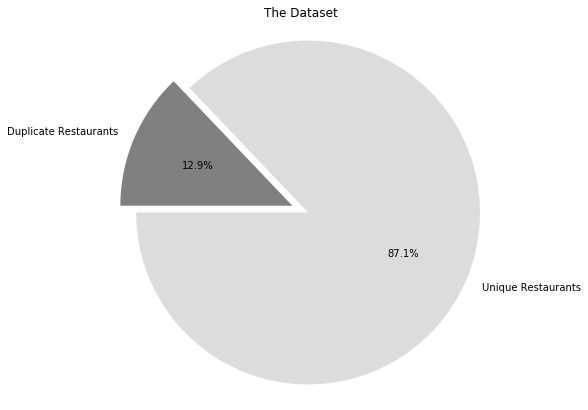

In [293]:
# pie graph of unique restaurants vs number of duplicate restaurants in the dataset
# data['duplicate'] = data.duplicated(subset = ['latitude','longitude'], keep = 'first') 
# print(data['duplicate'].value_counts())
fig1, ax1 = plt.subplots(figsize=(7,7))

fig1_labels = 'Unique Restaurants', 'Duplicate Restaurants'
ax1.pie([554095, 81977], 
        explode = (0, 0.1), 
        labels = fig1_labels, 
        autopct = '%1.1f%%', 
        shadow = False, 
        startangle = 180, 
        colors = ['gainsboro', 'gray'])
ax1.axis('equal')
ax1.set_title('The Dataset')

plt.show()

In [179]:
data['platform'].value_counts(normalize = True) * 100

doordash        54.929945
postmates       17.330900
grubhub         10.781641
ubereats        10.335308
delivery.com     5.134010
caviar           1.488196
Name: platform, dtype: float64

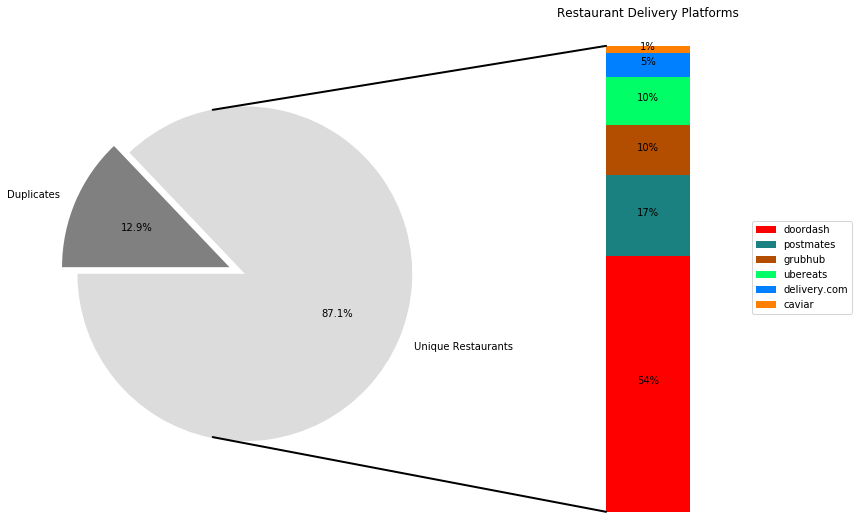

In [296]:
# make figure and assign axis objects
fig2 = plt.figure(figsize=(15, 9))
ax1 = fig2.add_subplot(121)
ax2 = fig2.add_subplot(122)
fig2.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [554095, 81977]
labels = 'Unique Restaurants', 'Duplicates'
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct = '%1.1f%%', startangle = angle, labels = labels, explode = explode, colors = ['gainsboro', 'gray'])

# bar chart parameters
xpos = 0
bottom = 0
ratios = [0.54929945, 0.17330900, 0.10781641, 0.10335308, 0.05134010, 0.01488196]
width = .2
colors = [[1, 0, 0], [0.1, 0.5, 0.5], [0.7, 0.3, 0], [0, 1, 0.4],[0, 0.5, 1], [1, 0.5, 0]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100), ha='center')

ax2.set_title('Restaurant Delivery Platforms')
ax2.legend(('doordash', 'postmates', 'grubhub', 'ubereats', 'delivery.com', 'caviar'), loc = 'center right')
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots    # get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(-0.1, 0.94),coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(-0.1, -1.015), coordsA="data",coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()

In [175]:
# count plot of unique restaurants vs number of duplicate restaurants in the dataset
data['duplicate'] = data.duplicated(subset = ['latitude','longitude'], keep = 'first') 
print(data['duplicate'].value_counts())

# sns.set_theme(style="darkgrid")
# titanic = sns.load_dataset("titanic")
# ax = sns.countplot(x="class", data=titanic)

False    554095
True      81977
Name: duplicate, dtype: int64


In [111]:
### bar graph of unique restaurants vs number of duplicate restaurants in the dataset 
# (if only active restaurants are considered)



In [112]:
### pie graph of frequencies of active vs inactive



In [121]:
### bar graph of active restaurants and the platforms they exist on

data[['platform']].plot.bar()
plt.show()

TypeError: no numeric data to plot

In [114]:
### bar graph of inactive restaurants and the platforms they exist on

In [115]:
# from mpl_toolkits.basemap import Basemap
### basemap plot all coordinates of all unique restaurants

## example code for basemap
# m = Basemap(
#     projection='merc', 
#     llcrnrlat=40.496044, 
#     urcrnrlat=40.915256, 
#     llcrnrlon=-74.255735, 
#     urcrnrlon=-73.700272,
#     resolution='i'
# )

# m.drawmapboundary(fill_color='#85A6D9')
# m.drawcoastlines(color='#6D5F47', linewidth=.4)
# m.drawrivers(color='#6D5F47', linewidth=.4)

# longitudes = districts["lon"].tolist()
# latitudes = districts["lat"].tolist()
# m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["saf_s_11"], cmap="summer")
# plt.show()

In [116]:
### plot all coordinates for unique restaurants in BOTH active and inactive
##### discuss the potential business value with regards to purchasing real estate, 
##### shows where in the country people like to order delivery from
### active shows where restaurants are still active
### inactive shows where restaurants have gone out of business potentially? 
##### discuss that this may show gaps in the market waiting to be filled
##### also discuss how those types of insights are outside of the scope of this analysis and needs more follow up

In [117]:
# also differences in platforms where delivery is an option in case 
# there needs to be some sort of competition research for stakeholders

# Potential Next Steps

In [118]:
# python dedupe
# discuss time constraints and how long it took to ensure data is good to work with
# supervised learning algorithms

# probabilities, naive bayes?

Now that we have the constant terms calculated above, we can move on with calculating the parameters $P(w_i|Spam)$ and $P(w_i|Ham)$. Each parameter will thus be a conditional probability value associated with each word in the vocabulary.

The parameters are calculated using the formulas:

$$
P(w_i|Spam) = \frac{N_{w_i|Spam} + \alpha}{N_{Spam} + \alpha \cdot N_{Vocabulary}}
$$$$
P(w_i|Ham) = \frac{N_{w_i|Ham} + \alpha}{N_{Ham} + \alpha \cdot N_{Vocabulary}}
$$

In [119]:
# AT THE END OF THIS PROJECT I WANT TO IMPLEMENT A ML ALGO ON A CLEAN DATASET 
# AND THEN COMPARE IT TO THE 'CORRECT' VALUE THAT I DETERMINE WITH SIMPLE LABELING FROM LAT AND LONG DATA